## Real Estate - price prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv('data.csv')  # pandas library

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'] # to access only 'CHAS' values

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts() # gives number of occurence of an specific value 

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282958,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702467,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline 
#use to plot graph right below command/code instead of new window 

In [9]:
import matplotlib.pyplot as plt 
#housing.hist(bins = 50, figsize=(20,15) )

## Train-Test spliting

In [10]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     shuffled = np.random.permutation(len(data)) # generates an array containing random indexing to distribute data randomly
#     np.random.seed(42) # fixed the shuffled data (keep same as first run) whenever we run the code 
#     print(shuffled)
#     test_set_size = int(len(data)*test_ratio) # extract data size of test data
#     test_indices = shuffled[ : test_set_size] # saperating training data indeces in random order
#     train_indices = shuffled[test_set_size : ] # saperating test data indeces in random order
#     return data.iloc[train_indices], data.iloc[test_indices]  

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)
# print(len(train_set), len(test_set)) 

In [12]:
# from sklearn.model_selection import train_test_split # inbuilt model to do train-test-splits of data
# train_set, test_set= train_test_split(housing , test_size = 0.2 , random_state = 42)
# print(len(train_set), len(test_set))


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):  # 'CHAS' is an important parameter
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
housing = strat_train_set.copy()

## looking for correlation

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.675523
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [19]:
from pandas.plotting import scatter_matrix
# attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
# scatter_matrix(housing[attributes], figsize= (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

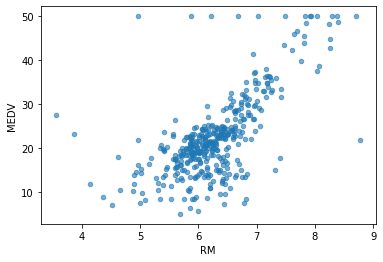

In [20]:
 housing.plot(kind='scatter', x='RM', y='MEDV', alpha = 0.6 ) 

## tying out attributes combination

In [21]:
housing['TAXRM'] = housing['TAX']/housing['RM'] 
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.675523
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525564
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

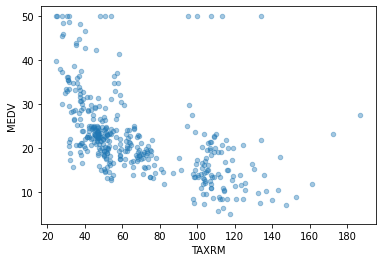

In [23]:
housing.plot(kind='scatter', x= 'TAXRM', y= 'MEDV', alpha = 0.4)

In [24]:
housing = strat_train_set.drop('MEDV', axis = 1)  # also excluded column 'TAXRM' 
housing_labels = strat_train_set['MEDV'].copy()

## missing attributes

In [25]:
# to take care of missing attributes, we have three options:
#     1. gets rid of missing data points
#     2. gets rid of missing attributes
#     3. to set missing points to some values eg, median, mean, etc.

In [26]:
a = housing.dropna(subset = ['RM']) # option one // doesnt change data in housing data frame 

In [27]:
a.shape

(401, 13)

In [28]:
housing.drop('RM', axis = 1).shape # option 2  // removes RM attributes completely only 14 column also original housing data 
# frame will remain same

(404, 12)

In [29]:
housing.describe() # RM  has missing values 401/404

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277115,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711409,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [30]:
median_RM = housing['RM'].median()  # calculating median of RM
median_RM

6.211

In [31]:
housing['RM'].fillna(median_RM) # option 3 // original housing data frame doesnt changes
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       401 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [32]:
housing.shape

(404, 13)

In [33]:
housing.describe() # RM  has missing values 401/404

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277115,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711409,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [34]:
# inbuiit function to perform option 3
from sklearn.impute import SimpleImputer
imput_median = SimpleImputer(strategy = 'median') #calculates median for all attributes 
imput_median.fit(housing) # automatically put respective median values for their respective attributes

SimpleImputer(strategy='median')

In [35]:
imput_median.statistics_  # 

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [36]:
x = imput_median.transform(housing)
housing_tr = pd.DataFrame(x, columns = housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276624,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.708779,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# # scikit - Learn Design

primarily, three types of objects
1. Estimator :- it estimates some paramters based upon the datasets. eg. imputer. it has a fit method and a transform method. 
Fit method- fits the datasets and calculates the internal parameters
2. Trans former:- transform method takes input and returns output based upon learning from fit(). it also have a convenience function fit_transform() which fits and then transform
3. Predictors:- LinearRegression is an example of predictor. fit() and predictor() is common function. it also have score() function which will evalulates the predictions.

## Feature Scaling

primarily, two types of feature scaling methods:

    1. Min-Max scaling (Normalization) 
    (value-min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this 
    
    2. Standardization 
    (value-min)/(std) 
    Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    # ....also can add more
    ('std_scaler', StandardScaler()),
])

In [39]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real Estates

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model= DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [41]:
some_data = housing.iloc[:5]   # extrating some data of training data set to check output
some_labels = housing_labels.iloc[:5]  # extrating some data of training data set to check output

In [42]:
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.161, 25.753, 16.271, 23.35 , 23.463])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
rmse    # if error = 0 (overfitting in case of DecisionTreeRegressor())

1.1757462681755413

## Using better evaluation technique - Cross Validation

In [45]:
# 1 , 2 ,3, 4, 5, 6, 7, 8, 9, 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring= 'neg_mean_squared_error', cv =10)
rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores

array([2.99622197, 2.67258408, 4.52849216, 4.06205419, 3.190821  ,
       2.66464401, 4.42418739, 3.46366786, 3.2985296 , 3.86072929])

In [47]:
def print_scores(scores):
    print('scores:', scores)
    print('mean :', scores.mean())
    print('standard deviation:', scores.std())

In [48]:
print_scores(rmse_scores)

scores: [2.99622197 2.67258408 4.52849216 4.06205419 3.190821   2.66464401
 4.42418739 3.46366786 3.2985296  3.86072929]
mean : 3.516193154992082
standard deviation: 0.6425774533984926


## Saving the Model

In [49]:
from joblib import dump, load
dump(model,'Estates.joblib')

['Estates.joblib']

# Testing the model on Test data

In [50]:
X_test = strat_test_set.drop('MEDV', axis = 1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [51]:
print(final_prediction, list(Y_test))

[24.58  11.022 25.928 21.685 18.717 15.126 20.303 14.589 31.282 38.358
 19.906 12.126 25.791 22.907 19.64  10.63  31.153 14.4   23.694 18.824
 19.48  17.843 14.166 22.038 18.804 32.054 16.131 33.868  8.79  33.846
 24.05  21.264 23.126 10.638 21.043 11.114 41.249 24.503 23.265 42.767
 24.058 28.951 20.216 20.514 19.204 33.348 44.483 20.486 20.163 21.108
 21.562 14.545 21.556 15.152 24.734 33.417 40.6   29.714 19.268 20.861
 47.322  9.279 20.077 25.441 15.024 33.04  20.237 17.881 18.397 34.339
 30.039 22.661 21.445 22.434 35.532 12.636 16.14  19.832 21.015 21.368
 22.291 21.1   14.038 22.939 20.406 21.512 13.91  21.262 21.793 23.294
 18.371 27.04   6.983 25.985 18.301 29.829 20.311 31.833 14.715 26.573
 21.005 20.536] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [52]:
final_rmse

2.9319366884532205

In [53]:
prepared_data

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.23820234, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.50625165, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.2929451 ,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.14038147, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.0499734 , -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

In [54]:
features = prepared_data[4]

In [55]:
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [56]:
from joblib import dump, load
import numpy as np
model = load('Estates.joblib')

In [57]:
model.predict([features])  # 2D array

array([23.463])